In [1]:
#importing dataset from the excel file
import pandas as pd

df=pd.read_csv(r"C:\Users\Rizwana\Desktop\Accenture - data science program\Fraud claim assignment\Final code\clean_dataset_fraud_claims.csv")
df.head(5)

C:\Users\Rizwana\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Rizwana\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,Deductible,...,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,FraudFound_P,RegistrationDate,RegistrationDate_Year,RegistrationDate_Month,RegistrationDate_Day
0,Jul,Honda,Urban,Sep,Male,Single,Policy Holder,Sedan,96494,400.0,...,No,External,no change,1 vehicle,All Perils,1.0,2023-01-05,2023,1,5
1,Jul,Honda,Rural,Jan,Male,Married,Policy Holder,Sport,89807,400.0,...,No,External,no change,1 vehicle,Collision,1.0,2020-11-09,2020,11,9
2,Jul,Honda,Urban,Aug,Male,Married,Policy Holder,Sedan,25517,400.0,...,No,External,no change,1 vehicle,Collision,1.0,2016-02-24,2016,2,24
3,Nov,Honda,Urban,Jan,Male,Single,Policy Holder,Sport,70903,400.0,...,No,External,no change,1 vehicle,Collision,1.0,2017-04-30,2017,4,30
4,Nov,Toyota,Urban,Jan,Male,Married,Policy Holder,Sedan,28016,400.0,...,No,External,no change,1 vehicle,Collision,1.0,2017-05-21,2017,5,21


In [2]:
# Get unique values from multiple columns
unique_values_dict = {}
for column in df.columns:
    unique_values_dict[column] = df[column].unique()

# Print unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Month': ['Jul' 'Nov' 'Dec' 'Jan' 'Aug' 'Feb' 'Mar' 'Jun' 'Apr' 'May' 'Oct' 'Sep']
Unique values in 'Make': ['Honda' 'Toyota' 'Chevrolet' 'Accura' 'Mazda' 'Pontiac' 'Ford' 'VW'
 'Dodge' 'Nissan' 'Saturn' 'Saab' 'Mercury' 'Mercedes' 'BMW' 'Jaguar'
 'Porsche' 'Ferrari' 'Lexus']
Unique values in 'AccidentArea': ['Urban' 'Rural']
Unique values in 'MonthClaimed': ['Sep' 'Jan' 'Aug' 'Dec' 'May' 'Nov' 'Feb' 'Apr' 'Mar' 'Oct' 'Jul' 'Jun']
Unique values in 'Sex': ['Male' 'Female']
Unique values in 'MaritalStatus': ['Single' 'Married' 'Divorced' 'Widow']
Unique values in 'Fault': ['Policy Holder' 'Third Party']
Unique values in 'VehicleCategory': ['Sedan' 'Sport' 'Utility']
Unique values in 'VehiclePrice': [96494 89807 25517 ... 37556 34145 14796]
Unique values in 'Deductible': [400.         500.         700.         300.         408.46363412
 379.         391.         354.         321.         380.
 310.         333.         311.         320.         322.
 324.         377.    

# Encoding dataset for the model

In [3]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the dataset
# Assuming you want to encode a specific column with custom labels

# Define custom labels
Sex_labels = {
    'Male': 0,
    'Female': 1,
    'Other': 2
}

Month_labels = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

Make_labels = {
    'Honda': 1,
    'Toyota': 2,
    'Chevrolet': 3,
    'Accura': 4,
    'Mazda': 5,
    'Pontiac': 6,
    'Ford': 7,
    'Lexus': 8,#### missed. changed nan to lexus because we dont have null values
    'VW': 9,
    'Dodge': 10,
    'Saab': 11,
    'Nissan': 12,
    'Saturn': 13,
    'Mercury': 14,
    'Mercedes': 15,
    'BMW': 16,
    'Jaguar': 17,
    'Porsche':18, ### missed
    'Ferrari':19,  ###missed
}

YN_labels = {
    'Yes': 1,
    'No': 0
}


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming 'Gender' is the column you want to encode
# If the column contains strings, you can map the custom labels to the values and then encode them
df['Sex'] = df['Sex'].map(Sex_labels)
df['Make'] = df['Make'].map(Make_labels)
df['Month'] = df['Month'].map(Month_labels)
df['MonthClaimed'] = df['MonthClaimed'].map(Month_labels)
df['PoliceReportFiled'] = df['PoliceReportFiled'].map(YN_labels)
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['Fault'] = label_encoder.fit_transform(df['Fault'])
df['VehicleCategory'] = label_encoder.fit_transform(df['VehicleCategory'])
df['AgentType'] = label_encoder.fit_transform(df['AgentType'])
df['AddressChange_Claim'] = label_encoder.fit_transform(df['AddressChange_Claim'])
df['NumberOfCars'] = label_encoder.fit_transform(df['NumberOfCars'])
df['BasePolicy'] = label_encoder.fit_transform(df['BasePolicy'])

df['Days_Policy_Accident'] = label_encoder.fit_transform(df['Days_Policy_Accident'])
df['Days_Policy_Claim'] = label_encoder.fit_transform(df['Days_Policy_Claim'])


df['AccidentArea'] = label_encoder.fit_transform(df['AccidentArea'])
df['PastNumberOfClaims'] = label_encoder.fit_transform(df['PastNumberOfClaims'])
df['AgeOfPolicyHolder'] = label_encoder.fit_transform(df['AgeOfPolicyHolder'])

df['WitnessPresent'] = label_encoder.fit_transform(df['WitnessPresent'])


In [4]:
print(df)

df = df.drop('RegistrationDate', axis = 1)


       Month  Make  AccidentArea  MonthClaimed  Sex  MaritalStatus  Fault  \
0          7     1             1             9    0              2      0   
1          7     1             0             1    0              1      0   
2          7     1             1             8    0              1      0   
3         11     1             1             1    0              2      0   
4         11     2             1             1    0              1      0   
...      ...   ...           ...           ...  ...            ...    ...   
19846      7     1             1             9    0              2      0   
19847     10     5             1            10    0              1      0   
19848      6     2             1             6    0              2      0   
19849      2     6             1             2    0              1      1   
19850      2     6             1             2    0              1      0   

       VehicleCategory  VehiclePrice  Deductible  ...  WitnessPresent  \
0 

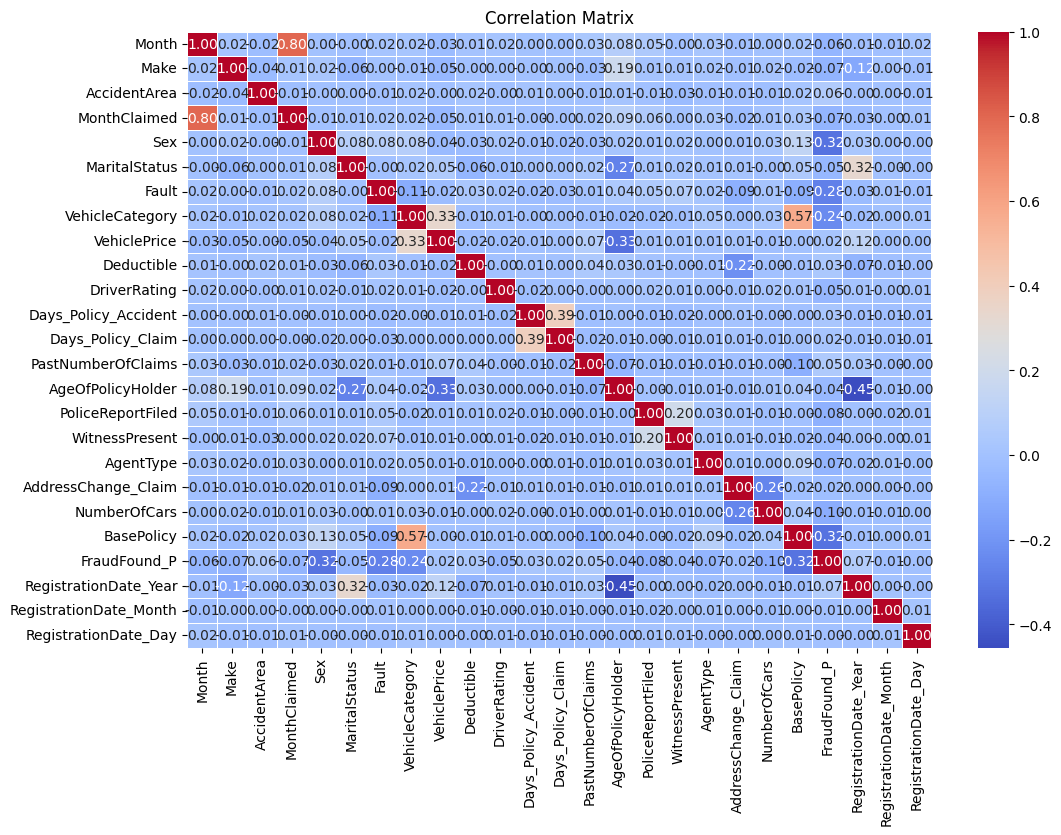

In [5]:
# Correlation Matrix for all the variables in df

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [6]:
from scipy.stats import chi2_contingency
import pandas as pd
from tabulate import tabulate

# Assuming df is your DataFrame containing categorical variables and a target variable
# Assuming 'target_variable' is your target variable

# Select the categorical variables you want to test
categorical_variables = list(df.columns)  # Convert Index object to list

# Include the target variable in the list of categorical variables
#categorical_variables.append('FraudFound_P')  # Append the target variable name

# Initialize an empty list to store the results
results = []

# Perform chi-square test for each categorical variable
for variable in categorical_variables:
    # Create a contingency table between the categorical variable and the target variable
    contingency_table = pd.crosstab(df[variable], df['FraudFound_P'])
    
    # Perform the chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Check if the p-value is greater than 0.01
    if p_value < 0.0001:
        # Append the results to the list
        results.append([variable, chi2, p_value, dof])

# Print the results as a table
headers = ['Variable', 'Chi2 statistic', 'P-value', 'Degrees of freedom']
print(tabulate(results, headers=headers, tablefmt='grid'))


+-----------------------+------------------+--------------+----------------------+
| Variable              |   Chi2 statistic |      P-value |   Degrees of freedom |
+=======================+==================+==============+======================+
| Month                 |         302.385  | 2.75353e-58  |                   11 |
+-----------------------+------------------+--------------+----------------------+
| Make                  |         432.195  | 1.72985e-80  |                   18 |
+-----------------------+------------------+--------------+----------------------+
| AccidentArea          |          63.209  | 1.85896e-15  |                    1 |
+-----------------------+------------------+--------------+----------------------+
| MonthClaimed          |         390.301  | 7.00133e-77  |                   11 |
+-----------------------+------------------+--------------+----------------------+
| Sex                   |        2012.84   | 0            |                    1 |
+---

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming df is your DataFrame containing features and target variable
# Assuming 'target_variable' is your target variable

# Separate features (X) and target variable (y)
X = df.drop(columns=['FraudFound_P'])  # Features
y = df['FraudFound_P']  # Target variable

# Initialize a Random Forest classifier (you can use any other classifier)
estimator = RandomForestClassifier()

# Initialize RFE with the estimator and desired number of features to select
rfe = RFE(estimator, n_features_to_select=10)  # Adjust the number of features as needed

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

# Print the ranking of each feature
print("\nFeature Rankings:")
for feature, rank in zip(X.columns, rfe.ranking_):
    print(f"{feature}: {rank}")

# Print the importance score of each feature
print("\nFeature Importance Scores:")
for feature, importance in zip(X.columns, rfe.estimator_.feature_importances_):
    print(f"{feature}: {importance}")


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Assuming df is your DataFrame containing features and target variable
# Assuming 'target_variable' is your target variable

# Separate features (X) and target variable (y)
X = df.drop(columns=['FraudFound_P'])  # Features
y = df['FraudFound_P']  # Target variable

# Initialize SelectKBest with the desired score function and number of features to select
selector = SelectKBest(score_func=f_classif, k=10)  # Adjust the number of features as needed

# Fit SelectKBest to the data
selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

# Print the scores of each feature
print("\nFeature Scores:")
for feature, score in zip(X.columns, selector.scores_):
    print(f"{feature}: {score}")


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


# Initialize a Random Forest classifier (you can use any other classifier)
estimator = RandomForestClassifier()

# Initialize RFE with the estimator and desired number of features to select
rfe = RFE(estimator, n_features_to_select=10)  # Adjust the number of features as needed

# Fit RFE to the data
rfe.fit(X_train_resampled, y_train_resampled)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

# Print the ranking of each feature
print("\nFeature Rankings:")
for feature, rank in zip(X.columns, rfe.ranking_):
    print(f"{feature}: {rank}")

# Print the importance score of each feature
print("\nFeature Importance Scores:")
for feature, importance in zip(X.columns, rfe.estimator_.feature_importances_):
    print(f"{feature}: {importance}")


# SMOTE for the train dataset

In [7]:
from sklearn.model_selection import train_test_split
 
data_clean = df.dropna(subset=['FraudFound_P'])
 
# Splitting the dataset into features and target variable
X = data_clean[['Make', 'MonthClaimed', 'Sex', 'Fault', 'VehicleCategory','VehiclePrice', 'DriverRating', 'BasePolicy', 'RegistrationDate_Month','RegistrationDate_Day']]
y = df['FraudFound_P']
 
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(15880, 10)
(15880,)
(3971, 10)
(3971,)


# Logistic Regression

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_train_resampled.value_counts())

FraudFound_P
0.0    11274
1.0     4606
Name: count, dtype: int64
FraudFound_P
0.0    11274
1.0    11274
Name: count, dtype: int64


In [ ]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

# Assuming you have X_train_resampled, y_train_resampled, X_test, y_test available

# Initialize logistic regression model
log_reg_model = LogisticRegression()

# Fit the model on the resampled training data
log_reg_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = log_reg_model.predict(X_test)

# Now you can evaluate the model's performance using appropriate metrics


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have X_train_resampled, y_train_resampled, X_test, y_test available

# Initialize Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model on the resampled training data
naive_bayes_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = naive_bayes_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8244774615965752

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.87      2893
         1.0       0.64      0.79      0.71      1078

    accuracy                           0.82      3971
   macro avg       0.78      0.81      0.79      3971
weighted avg       0.84      0.82      0.83      3971



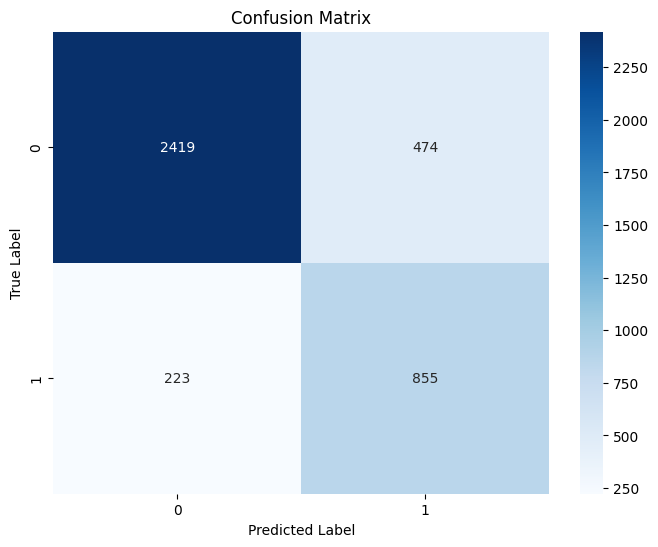

In [10]:
#Applying actual model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the RandomForestClassifier with best hyperparameters generated -
rf_classifier = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=300)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [15]:
probabilities = rf_classifier.predict_proba(X_test)

In [19]:
def pred_table_line_chart(probabilities, label):
    predicted_range = []
    for prob in probabilities:
        if prob[1] >= 0.85:
            predicted_range.append('Very High Risk')
        elif prob[1] >= 0.7 and prob[1] <= 0.85:
            predicted_range.append('High Risk')
        elif prob[1] >= 0.3 and prob[1] <= 0.7:
            predicted_range.append('Medium Risk')
        else:
            predicted_range.append('Low Risk')

    df_results = pd.DataFrame({"Predicted Range": predicted_range, "Actual Value": y_test})
    df_results['Actual Value'] = df_results['Actual Value'].replace({0: 'Not Fraud', 1: 'Fraud'})
    df_pred = df_results.groupby(["Predicted Range", "Actual Value"]).size().reset_index(name='Count')

    # Add counts of fraud and not fraud cases
    fraud_counts = df_results[df_results['Actual Value'] == 'Fraud'].groupby("Predicted Range").size().reset_index(name='Fraud Count')
    not_fraud_counts = df_results[df_results['Actual Value'] == 'Not Fraud'].groupby("Predicted Range").size().reset_index(name='Not Fraud Count')

    df_pred = df_pred.merge(fraud_counts, how='left', on='Predicted Range')
    df_pred = df_pred.merge(not_fraud_counts, how='left', on='Predicted Range')

    # Plot a line graph
    plt.plot(df_pred['Predicted Range'], df_pred['Fraud Count'], label='Fraud Found', marker='o')
    plt.plot(df_pred['Predicted Range'], df_pred['Not Fraud Count'], label='Not Fraud', marker='o')
    plt.title(label)
    plt.xlabel('Predicted Range')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()

    # Annotate each point with its count
    for i, count in enumerate(df_pred['Fraud Count']):
        plt.annotate(count, (df_pred['Predicted Range'][i], count), textcoords="offset points", xytext=(0,10), ha='center')

    for i, count in enumerate(df_pred['Not Fraud Count']):
        plt.annotate(count, (df_pred['Predicted Range'][i], count), textcoords="offset points", xytext=(0,10), ha='center')

    plt.grid(True)
    plt.show()


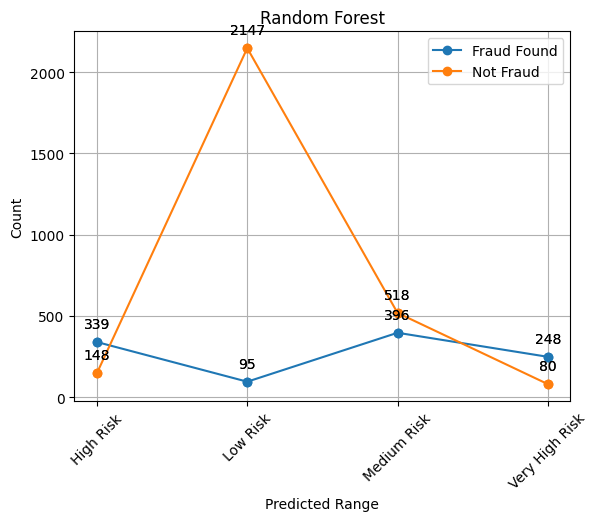

In [20]:
pred_table_line_chart(probabilities, 'Random Forest')
